In [21]:
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import plot_roc_curve

import joblib
from tkinter import *


In [22]:
import warnings 
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('heart.csv')

In [24]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [25]:
data.duplicated().any()

True

In [26]:
data.drop_duplicates(inplace = True)

In [27]:
cate_val = []
cont_val = []

for col in data.columns:
    if data[col].nunique() <= 10:
        cate_val.append(col)
        
    else:
        cont_val.append(col)

In [28]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [29]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [30]:
cate_val.remove('sex')
cate_val.remove('target')


In [31]:
data = pd.get_dummies(data,columns=cate_val,drop_first=True)
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,53,1,140,203,155,3.1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,70,1,145,174,125,2.6,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,61,1,148,203,161,0.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,62,0,138,294,106,1.9,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,115,1.5,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,44,0,108,141,175,0.6,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,52,1,128,255,161,0.0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,59,1,160,273,125,0.0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [32]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [33]:
data

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,1,0,1,0,...,0,1,0,0,0,0,0,0,1,0
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,0,0,0,0,...,1,0,1,1,0,0,0,0,0,1
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [34]:
X  = data.drop('target',axis=1)
y = data['target']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [36]:
log = LogisticRegression()
log.fit(X_train,y_train)
y_pred1 = log.predict(X_test)
a1 = accuracy_score(y_test,y_pred1)

In [37]:
svm = svm.SVC()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)
a2 = accuracy_score(y_test,y_pred2)

In [38]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred3 = knn.predict(X_test)
a3 = accuracy_score(y_test,y_pred3)

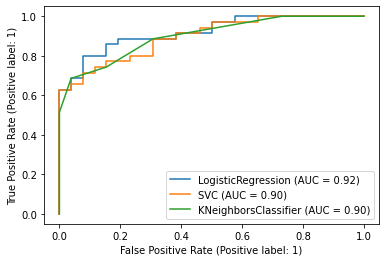

In [39]:
# القدرة على الفصل بين القيمتين المتنبأ بهما 0و1
disp = plot_roc_curve(log,X_test,y_test)
plot_roc_curve(svm,X_test,y_test,ax=disp.ax_)
plot_roc_curve(knn,X_test,y_test,ax=disp.ax_)
# AUC قيمة الفصل
# تحب المنحني يمثل المساحة من البيانات التى إستطاع النموذج أن يفصلها 
# فوق المنحني يمثل المساحة من البيانات التى لم يستطع المنحني الفصل بينهما

In [40]:
# إختيار افضل عدد جيران للنموذج 
score = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test,y_pred))

score

[0.6557377049180327,
 0.8032786885245902,
 0.7704918032786885,
 0.7868852459016393,
 0.7868852459016393,
 0.8032786885245902,
 0.7868852459016393,
 0.819672131147541,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7868852459016393,
 0.7704918032786885,
 0.7704918032786885,
 0.7868852459016393,
 0.7540983606557377,
 0.7540983606557377,
 0.7704918032786885,
 0.8360655737704918,
 0.8032786885245902,
 0.8360655737704918,
 0.819672131147541,
 0.8032786885245902,
 0.7868852459016393,
 0.819672131147541,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918,
 0.819672131147541,
 0.8360655737704918,
 0.819672131147541,
 0.8360655737704918,
 0.819672131147541,
 0.8524590163934426,
 0.8360655737704918,
 0.8360655737704918,
 0.8360655737704918]

In [41]:
# ملاحظة هنا يبدأ العد من 0 نضيف 1 عند الإختيار 
score = list(enumerate(score))
score

[(0, 0.6557377049180327),
 (1, 0.8032786885245902),
 (2, 0.7704918032786885),
 (3, 0.7868852459016393),
 (4, 0.7868852459016393),
 (5, 0.8032786885245902),
 (6, 0.7868852459016393),
 (7, 0.819672131147541),
 (8, 0.7868852459016393),
 (9, 0.7868852459016393),
 (10, 0.7868852459016393),
 (11, 0.7868852459016393),
 (12, 0.7704918032786885),
 (13, 0.7704918032786885),
 (14, 0.7868852459016393),
 (15, 0.7540983606557377),
 (16, 0.7540983606557377),
 (17, 0.7704918032786885),
 (18, 0.8360655737704918),
 (19, 0.8032786885245902),
 (20, 0.8360655737704918),
 (21, 0.819672131147541),
 (22, 0.8032786885245902),
 (23, 0.7868852459016393),
 (24, 0.819672131147541),
 (25, 0.8360655737704918),
 (26, 0.8360655737704918),
 (27, 0.8360655737704918),
 (28, 0.8360655737704918),
 (29, 0.8360655737704918),
 (30, 0.819672131147541),
 (31, 0.8360655737704918),
 (32, 0.819672131147541),
 (33, 0.8360655737704918),
 (34, 0.819672131147541),
 (35, 0.8524590163934426),
 (36, 0.8360655737704918),
 (37, 0.836065573

In [42]:
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
a3 = accuracy_score(y_test,y_pred)

In [43]:
data = pd.read_csv('heart.csv')

In [44]:
data.drop_duplicates(inplace=True)

In [45]:
X = data.drop('target',axis=1)
y = data['target']

In [46]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [47]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred4 = dt.predict(X_test)
a4 = accuracy_score(y_test,y_pred4)

In [48]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred5 = rf.predict(X_test)
a5 = accuracy_score(y_test,y_pred5)

In [49]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
y_pred6 = gbc.predict(X_test)
a6 = accuracy_score(y_test,y_pred6)

In [50]:
Final_data = pd.DataFrame({'Model':['LR','SVM','KNN','DT','RF','GB'],
                         'ACC':[a1,a2,a3,a4,a5,a6]})

In [51]:
Final_data

,Model,ACC
0,LR,0.836066
1,SVM,0.803279
2,KNN,0.836066
3,DT,0.770492
4,RF,0.803279
5,GB,0.786885


<AxesSubplot:xlabel='Model', ylabel='ACC'>

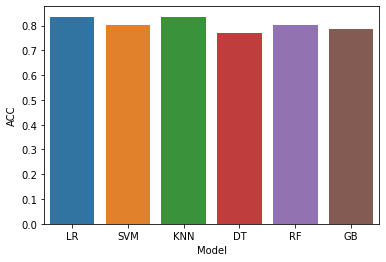

In [52]:
sns.barplot(Final_data['Model'],Final_data['ACC'])

In [53]:
X = data.drop('target',axis=1)
y = data['target']

In [54]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [55]:
l = list(data.columns)
l

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

In [56]:
l.remove('target')
l

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [57]:
new_data  = pd.DataFrame([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]],columns=l)

In [58]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3


In [59]:
p = rf.predict(new_data)
if p[0]==0:
    print('No Disease')
else:
    print('Disease')

No Disease


In [60]:
joblib.dump(rf,'model_joblib_heart')
model = joblib.load('model_joblib_heart')
model.predict(new_data)

array([0], dtype=int64)

In [61]:
def show():
    p1 = int(e1.get())
    p2 = int(e2.get())
    p3 = int(e3.get())
    p4 = int(e4.get())
    p5 = int(e5.get())
    p6 = int(e6.get())
    p7 = int(e7.get())
    p8 = int(e8.get())
    p9 = int(e9.get())
    p10 = int(e10.get())
    p11 = int(e11.get())
    p12 = int(e12.get())
    p13 = int(e13.get())
    model =joblib.load('model_joblib_heart')
    result = model.predict([[p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13]])
    
    Label(master, text = 'Possibility').grid(row=14)
    Label(master,text=result[0]).grid(row=15)

master = Tk()
master.title('Heart Diseases Prediction')
label = Label(master,text = 'Heart Diseases Prediction',bg = 'black',fg='white').grid(row=0,columnspan= 2)
Label(master,text='Age').grid(row =1 )
Label(master,text='sex').grid(row =2 )
Label(master,text='cp').grid(row =3)
Label(master,text='trestbps').grid(row =4 )
Label(master,text='chol').grid(row =5 )
Label(master,text='fbs').grid(row =6 )
Label(master,text='restecg').grid(row =7 )
Label(master,text='thalach').grid(row =8 )
Label(master,text='exang').grid(row =9 )
Label(master,text='oldpeak').grid(row =10 )
Label(master,text='slope').grid(row =11 )
Label(master,text='ca').grid(row =12 )
Label(master,text='thal').grid(row =13 )



e1 = Entry(master)
e2 = Entry(master)
e3 = Entry(master)
e4 = Entry(master)
e5 = Entry(master)
e6 = Entry(master)
e7 = Entry(master)
e8 = Entry(master)
e9 = Entry(master)
e10 = Entry(master)
e11 = Entry(master)
e12 = Entry(master)
e13 = Entry(master)



e1.grid(row=1,column=1)
e2.grid(row=2,column=1)
e3.grid(row=3,column=1)
e4.grid(row=4,column=1)
e5.grid(row=5,column=1)
e6.grid(row=6,column=1)
e7.grid(row=7,column=1)
e8.grid(row=8,column=1)
e9.grid(row=9,column=1)
e10.grid(row=10,column=1)
e11.grid(row=11,column=1)
e12.grid(row=12,column=1)
e13.grid(row=13,column=1)



Button(master,text='Predict',command=show).grid()

mainloop()